# 1. Import packages

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import cv2
from mpl_toolkits.mplot3d import Axes3D
import imutils
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits

# 2. Import image 

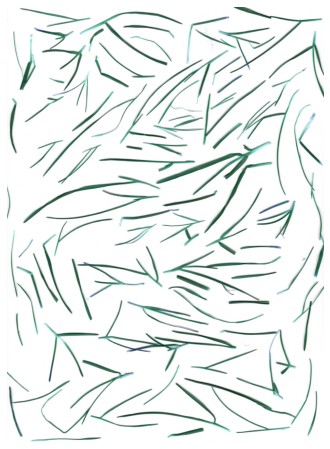

In [ ]:
image= cv2.imread(r"image_location")
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.axis('off')
plt.show()

# 3. Gray color and reshape

<ipython-input-52-3049ae35d4d4>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  a = np.asarray(image2,dtype=np.float)


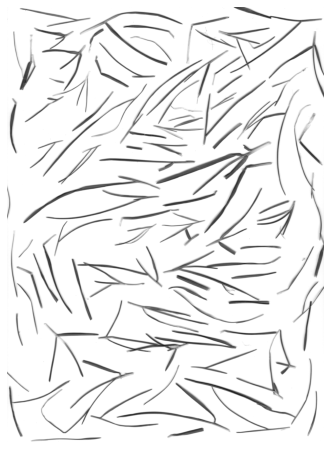

In [ ]:
image = Image.fromarray(image)
image2 = image.convert('L')
a = np.asarray(image2,dtype=np.float)

plt.figure(figsize=(8,8))
plt.imshow(a,cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
x , y = a.shape
print('a shape ', a.shape)

a1 = a.reshape(x*y,1)
print('a1 shape ', a1.shape)

a shape  (3509, 2550)
a1 shape  (8947950, 1)


# 4. K Means - Unsupervised classification method

In [ ]:
k_means = KMeans(n_clusters=3)
k_means.fit(a1) 

KMeans(n_clusters=3)

In [ ]:
centroids = k_means.cluster_centers_
labels = k_means.labels_

In [ ]:
a2 = centroids[labels]
print('a2 shape ', a2.shape)

a2 shape  (8947950, 1)


In [ ]:
a3 = a2.reshape(x, y)
print('a3 shape ', a3.shape)

a3 shape  (3509, 2550)


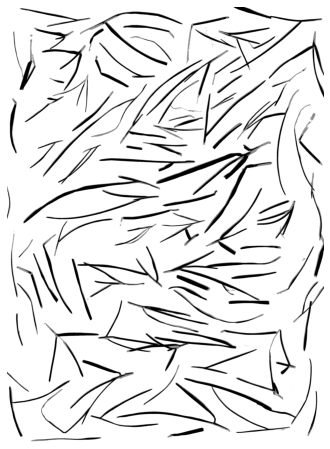

In [ ]:
plt.figure(figsize=(8,8))
plt.imshow(a3,cmap='gray')
plt.axis('off')
plt.show()

# 5. Leaf Area

In [ ]:

a4 = (a3 -  np.min(a3))/(np.max(a3)-np.min(a3))*255
a5 = a4.astype(np.uint8)
I2 = Image.fromarray(a5)
w, h =I2.size
colors = I2.getcolors(w * h)
print(colors)

[(756127, 0), (459350, 141), (7732473, 255)]


In [ ]:
print ('Area = ',  float(641.61)*float(colors[0][0])/float(w*h), 'cm2')

Area =  54.21785375085914 cm2
